In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

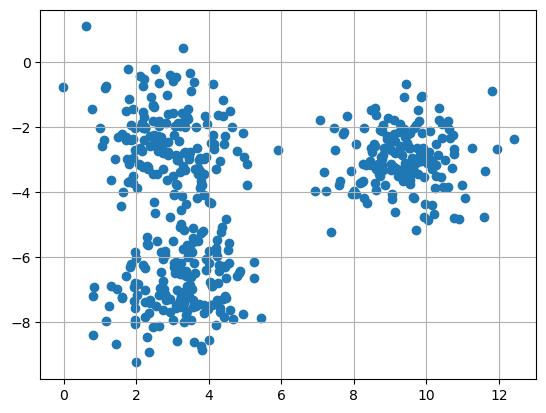

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 30)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
X

array([[ 4.05395198, -4.32097976],
       [ 7.44235089, -2.00921666],
       [10.66549625, -2.33245035],
       [ 2.677733  , -2.43063087],
       [ 1.93428228, -6.91751417],
       [ 2.51424209, -2.52936438],
       [ 2.66688617, -6.9484486 ],
       [ 2.81855595, -1.88198715],
       [ 8.45313953, -3.03859904],
       [ 3.10150904, -6.19777386],
       [ 9.50331269, -3.47916365],
       [ 8.61394704, -3.27570642],
       [10.23557253, -3.88220083],
       [ 4.47801161, -6.64564217],
       [ 1.75079348, -2.98547965],
       [ 3.61612625, -6.51036372],
       [10.09224378, -2.11396007],
       [ 8.65822626, -3.14451924],
       [ 9.70433093, -1.9318645 ],
       [ 3.24956315, -7.21160023],
       [ 3.90417187, -1.64629726],
       [ 0.80672571, -8.40886536],
       [ 8.73576267, -3.49103516],
       [ 2.82519746, -7.20824605],
       [ 9.84337598, -3.05235371],
       [ 3.66879828, -2.64356305],
       [ 2.31083957, -3.20000737],
       [ 2.58037701, -3.44882794],
       [ 9.69673727,

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-3.44303810e-01 -4.78896272e-02]
 [ 2.00987181e-01  3.98169493e-01]
 [ 7.19684116e-01  3.35800934e-01]
 [-5.65777088e-01  3.16856814e-01]
 [-6.85419725e-01 -5.48895916e-01]
 [-5.92087485e-01  2.97805994e-01]
 [-5.67522654e-01 -5.54864775e-01]
 [-5.43114619e-01  4.22718671e-01]
 [ 3.63652190e-01  1.99548191e-01]
 [-4.97579315e-01 -4.10020644e-01]
 [ 5.32655303e-01  1.14540404e-01]
 [ 3.89530751e-01  1.53797868e-01]
 [ 6.50497004e-01  3.67736084e-02]
 [-2.76060400e-01 -4.96437694e-01]
 [-7.14948358e-01  2.09797678e-01]
 [-4.14762582e-01 -4.70335457e-01]
 [ 6.27431280e-01  3.77959052e-01]
 [ 3.96656553e-01  1.79110686e-01]
 [ 5.65004929e-01  4.13094741e-01]
 [-4.73753144e-01 -6.05640385e-01]
 [-3.68407745e-01  4.68195487e-01]
 [-8.66876057e-01 -8.36654987e-01]
 [ 4.09134394e-01  1.12249774e-01]
 [-5.42045808e-01 -6.04993189e-01]
 [ 5.87381282e-01  1.96894202e-01]
 [-4.06286135e-01  2.75771143e-01]
 [-6.24820810e-01  1.68404144e-01]
 [-5.81444470e-01  1.20393739e-01]
 [ 5.63782889e-01  2

In [5]:
k = 4

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = np.random.uniform(low = -1, high = 1,size = X_scaled.shape[1])
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.03459577, 0.89392521]), 'points': []},
 1: {'center': array([ 0.53091952, -0.43520831]), 'points': []},
 2: {'center': array([-0.55790927,  0.37244417]), 'points': []},
 3: {'center': array([-0.66572159, -0.21511507]), 'points': []}}

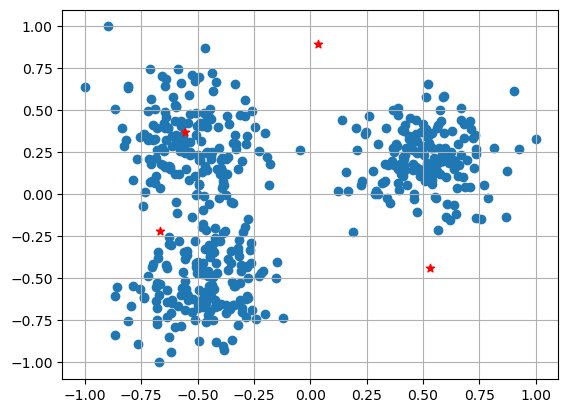

In [6]:
plt.scatter(X_scaled[:,0],X_scaled[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [7]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters
    
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [8]:
clusters = assign_clusters(X_scaled,clusters)
clusters = update_clusters(X_scaled,clusters)
pred = pred_cluster(X_scaled,clusters)

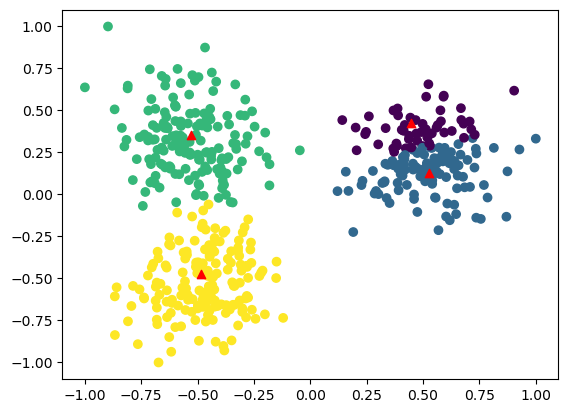

In [9]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

what to do when the data is not standarized?